/var/folders/38/vj2ynxq51tx1g3vphmrk2cvr0000gn/T/ipykernel_37605/3371756588.py:33: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  x = integrate.cumtrapz(v_values, t_values, initial=0)


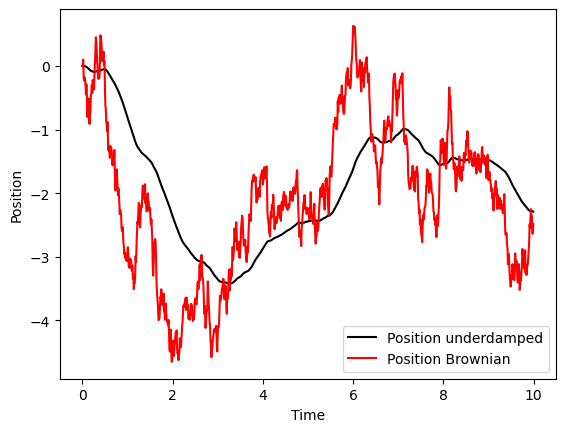

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as sk
from scipy import integrate

#Parameters
m = 1 #mass
gamma = 1 #damping coefficient
k_B = 1.0 #Boltzmann constant
T = 1.0 #Temperature
dt = 0.01 #time step
num_steps = 1000 #number of time steps

#Initial Conditions
v0 = 0.0 #initial velocity
t_values = np.arange(0, num_steps*dt, dt)
v_values = np.zeros_like(t_values)
x_Brownian = np.zeros_like(t_values)

#Numerical solution using Euler-Maruyama method
for i in range(1, num_steps):
    #Random force term
    epsilon_random = np.random.normal(0, np.sqrt(2 * gamma * k_B * T / dt))
    
    #Update velocity
    v_values[i] = v_values[i-1] + (-gamma/m * v_values[i-1] + epsilon_random/m) * dt
    
    #Update position
    x_Brownian[i] = x_Brownian[i-1] + gamma ** (-1.0) * epsilon_random * dt
    
x = integrate.cumtrapz(v_values, t_values, initial=0)

plt.plot(t_values, x, 'k',label='Position underdamped')    
plt.plot(t_values, x_Brownian, 'r',label='Position Brownian')

plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()

